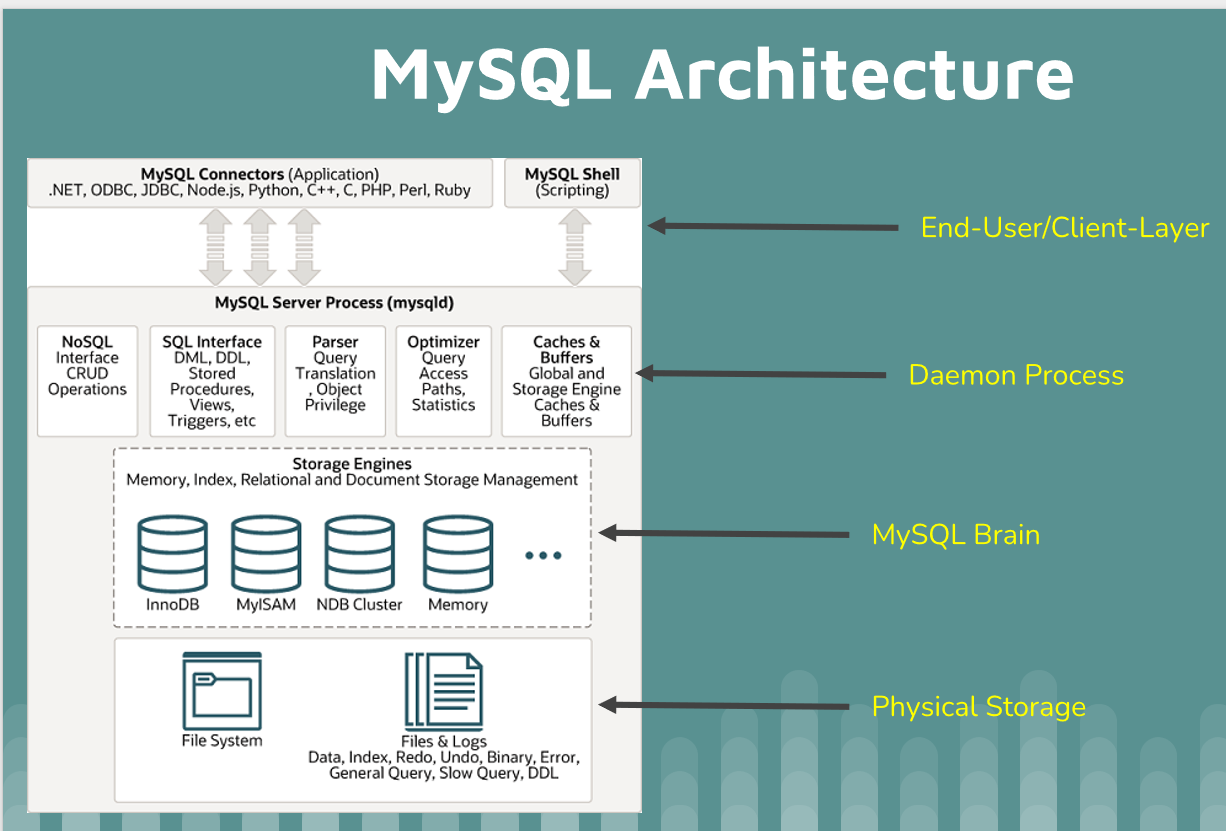

In [ ]:
MySQL File Types and Locations 
==========================================

Data directory -- all datafiles reside here with parameter datadir.
               -- default location is /var/lib/mysql.
               -- a folder is created for each database.
               -- owned by mysql user created during installation.

mysql> select @@datadir;
+-----------------+
| @@datadir       |
+-----------------+
| /var/lib/mysql/ |
+-----------------+

[root@mysqlserver Downloads]# ls -rtl /var/lib/mysql | grep drw
drwxr-x---. 2 mysql mysql     8192 May 14 15:48 performance_schema
drwxr-x---. 2 mysql mysql      143 May 14 15:48 mysql
drwxr-x---. 2 mysql mysql       28 May 14 15:48 sys
drwxr-x---. 2 mysql mysql      187 May 14 15:48 #innodb_temp
drwxr-x---. 2 mysql mysql     4096 May 14 15:48 #innodb_redo
[root@mysqlserver Downloads]# 


Log files -- logs all the errors , warnings and startup and shutdown messages.
          -- default location is /var/log/mysqld.log

[root@mysqlserver ~]# ls -rtl /var/log/mysqld.log 
-rw-r-----. 1 mysql mysql 1385 May 14 15:48 /var/log/mysqld.log
[root@mysqlserver ~]# 


Global configuration file  -- contains all the configuration settings which will be loaded at server startup.
                           -- default location is /etc/my.cnf.

[root@mysqlserver ~]# ls -rtl /etc/my.cnf
-rw-r--r--. 1 root root 1243 Jul  7  2022 /etc/my.cnf
[root@mysqlserver ~]# 

In [ ]:
mysql executable location 
===========================

[root@mysqlserver ~]# ls -rtl /usr/bin/mysql*
-rwxr-xr-x. 1 root root    7669 Jul  7  2022 /usr/bin/mysqldumpslow
-rwxr-xr-x. 1 root root    4368 Jul  7  2022 /usr/bin/mysqld_pre_systemd
-rwxr-xr-x. 1 root root    5018 Jul  7  2022 /usr/bin/mysql_config-64
-rwxr-xr-x. 1 root root     840 Jul  7  2022 /usr/bin/mysql_config
-rwxr-xr-x. 1 root root 7329512 Jul  7  2022 /usr/bin/mysqlcheck
-rwxr-xr-x. 1 root root 7326712 Jul  7  2022 /usr/bin/mysqlslap
-rwxr-xr-x. 1 root root 7615808 Jul  7  2022 /usr/bin/mysql

In [ ]:
MySql Shell Commands 
====================================


mysql> help  or  mysql> \h  ( list all commmands )

List of all MySQL commands:
Note that all text commands must be first on line and end with ';'
?         (\?) Synonym for `help'.
clear     (\c) Clear the current input statement.
connect   (\r) Reconnect to the server. Optional arguments are db and host.
delimiter (\d) Set statement delimiter.


mysql> connect  or  mysql> \r   ( reconnect )

Connection id:    15
Current database: *** NONE ***

mysql> connect sys
Reading table information for completion of table and column names
You can turn off this feature to get a quicker startup with -A

Connection id:    16
Current database: sys


Edit the previously executed Sql statement
=====================================================

mysql> select @@hostname , @version ;
+-------------+--------------------+
| @@hostname  | @version           |
+-------------+--------------------+
| mysqlserver | NULL               |
+-------------+--------------------+
1 row in set (0.00 sec)

mysql> edit
    -> ;
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)


mysql> prompt sysdb@mysql> 
PROMPT set to 'sysdb@mysql> '
sysdb@mysql> 
sysdb@mysql> select @@version;
+-----------+
| @@version |
+-----------+
| 8.0.30    |
+-----------+
1 row in set (0.00 sec)


Execute a system shell command ( system \! )
============================================================

sysdb@mysql> system vi script1.sql
sysdb@mysql> 

sysdb@mysql> \! pwd
/root

sysdb@mysql> \! ls -rtl
total 48
-rwxr-xr-x. 1 root root 36328 Feb 17 04:06 mariadb_repo_setup
-rw-------. 1 root root  1263 May 13 13:50 anaconda-ks.cfg
-rw-r--r--. 1 root root  1545 May 13 13:52 initial-setup-ks.cfg
-rw-r--r--. 1 root root    32 May 14 16:27 script1.sql
sysdb@mysql> 


Execute an SQL script file. Takes a file name as an argument ( source \.)
==============================================================================

sysdb@mysql> source script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> \. script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)



Set outfile [to_outfile]. Append everything into given outfile ( tee or \T )
===================================================================================

sysdb@mysql> \T outfile.txt
Logging to file 'outfile.txt'
sysdb@mysql> \. script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> source script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> select @@hostname;
+-------------+
| @@hostname  |
+-------------+
| mysqlserver |
+-------------+
1 row in set (0.00 sec)

sysdb@mysql> \T
Currently logging to file 'outfile.txt'
sysdb@mysql> \q


In [ ]:
MySql Socket File  ( mysql.sock )
===============================================

-- is a special file which manages connections to the mysql server.
-- used for local connections , without this local users can't connect to the mysql server.
-- default location is /var/lib/mysql.
-- Local connection = UNIX socket  - Remote connection = TCP/IP.


[root@mysqlserver ~]# ls -rtl /var/lib/mysql/mysql*.sock*
-rw-------. 1 mysql mysql 5 May 14 15:48 /var/lib/mysql/mysql.sock.lock
srwxrwxrwx. 1 mysql mysql 0 May 14 15:48 /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# 

[root@mysqlserver ~]# cat /var/lib/mysql/mysql.sock
cat: /var/lib/mysql/mysql.sock: No such device or address
[root@mysqlserver ~]# 

[root@mysqlserver ~]# cat /var/lib/mysql/mysql.sock.lock
8137
[root@mysqlserver ~]# pidof mysqld
8137
[root@mysqlserver ~]# 


mysql> select user , host from mysql.user;
+------------------+-----------+
| user             | host      |
+------------------+-----------+
| db_admin         | %         |
| mysql.infoschema | localhost |
| mysql.session    | localhost |
| mysql.sys        | localhost |
| root             | localhost |
+------------------+-----------+
5 rows in set (0.00 sec)

mysql> show processlist;
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
| Id | User            | Host                | db   | Command | Time | State                  | Info             |
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
|  5 | event_scheduler | localhost           | NULL | Daemon  | 3812 | Waiting on empty queue | NULL             |
| 22 | db_admin        | 192.168.153.1:63777 | NULL | Sleep   |   45 |                        | NULL             |
| 23 | db_admin        | 192.168.153.1:63778 | NULL | Sleep   |   45 |                        | NULL             |
| 24 | root            | localhost           | NULL | Query   |    0 | init                   | show processlist |
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
4 rows in set (0.00 sec)


[root@mysqlserver ~]# rm -rf /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# rm -rf /var/lib/mysql/mysql.sock.lock
[root@mysqlserver ~]# 


[root@mysqlserver ~]# mysql -u root -p
Enter password: 
ERROR 2002 (HY000): Can't connect to local MySQL server through socket '/var/lib/mysql/mysql.sock' (2)
[root@mysqlserver ~]# 


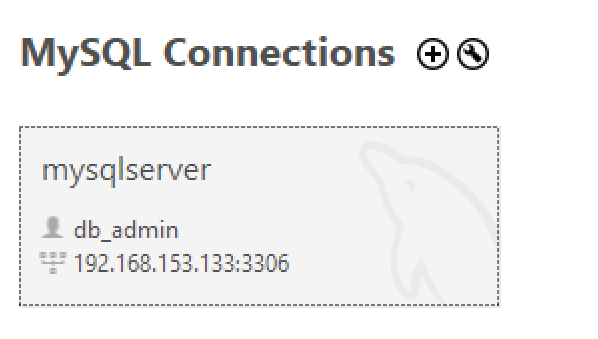

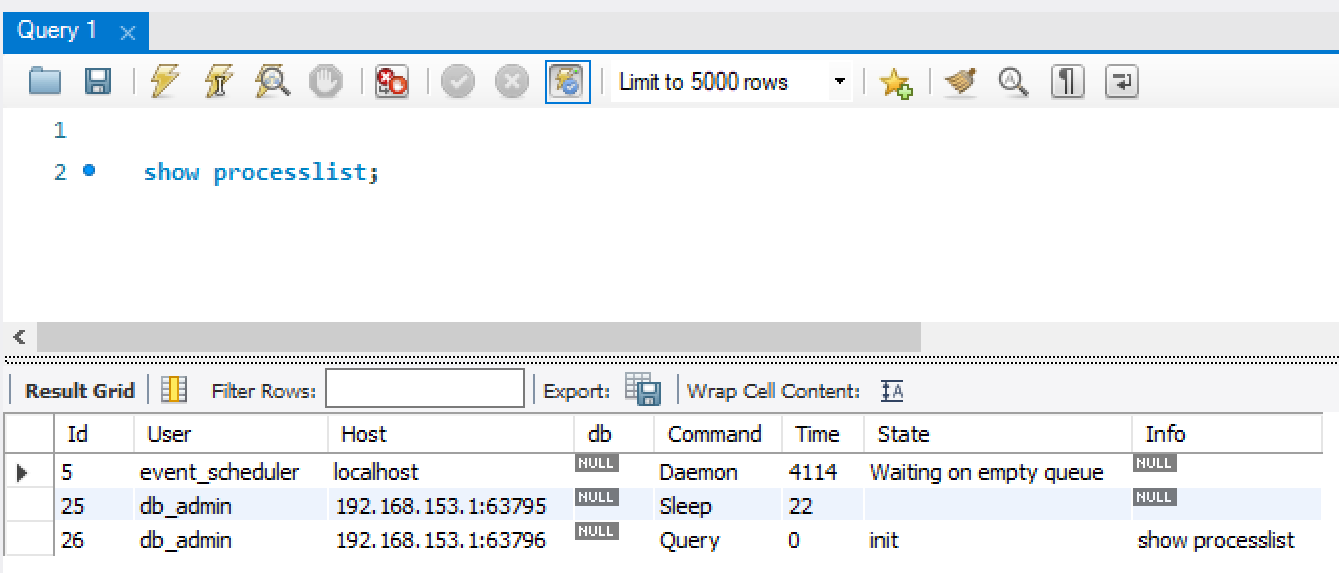

In [ ]:
[root@mysqlserver ~]# systemctl restart mysqld
[root@mysqlserver ~]# 
[root@mysqlserver ~]# ls -rtl /var/lib/mysql/mysql*.sock*
-rw-------. 1 mysql mysql 5 May 14 16:58 /var/lib/mysql/mysql.sock.lock
srwxrwxrwx. 1 mysql mysql 0 May 14 16:58 /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# 
[root@mysqlserver ~]# mysql -u root -p
Enter password: 
Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 8
Server version: 8.0.30 MySQL Community Server - GPL

mysql> 

In [ ]:
MySQL Global and Session Variables 
==========================================

-- MySQL has system variables that control the operation of mysql.
-- system variables have global and session scope.
-- each global variable has a default value which is initialised during system startup.
-- default value can be changed via option file or command line.

mysql> select @@server_id;
+-------------+
| @@server_id |
+-------------+
|           1 |
+-------------+
1 row in set (0.00 sec)

mysql> select @@max_connections;
+-------------------+
| @@max_connections |
+-------------------+
|               151 |
+-------------------+
1 row in set (0.00 sec)

In [ ]:
MySQL system databases 
====================================

information_schema -- system catalog or data dictionary , tables in this are read-only.

mysql -- contains tables with user info , scheduler info , timezone info.

performance_schema -- contains performance data , wait events , database locks.

sys - contains info about the system , database host summary , io usage , memory usage.

mysql> select table_name , table_type , engine from tables where table_schema = 'information_schema';
+---------------------------------------+-------------+--------+
| TABLE_NAME                            | TABLE_TYPE  | ENGINE |
+---------------------------------------+-------------+--------+
| ADMINISTRABLE_ROLE_AUTHORIZATIONS     | SYSTEM VIEW | NULL   |
| APPLICABLE_ROLES                      | SYSTEM VIEW | NULL   |
| CHARACTER_SETS                        | SYSTEM VIEW | NULL   |
| CHECK_CONSTRAINTS                     | SYSTEM VIEW | NULL   |
| COLLATIONS                            | SYSTEM VIEW | NULL   |

mysql> select table_name , table_type , engine from tables where table_schema = 'mysql';
+------------------------------------------------------+------------+--------+
| TABLE_NAME                                           | TABLE_TYPE | ENGINE |
+------------------------------------------------------+------------+--------+
| columns_priv                                         | BASE TABLE | InnoDB |
| func                                                 | BASE TABLE | InnoDB |
| general_log                                          | BASE TABLE | CSV    |
| global_grants                                        | BASE TABLE | InnoDB |
| gtid_executed                                        | BASE TABLE | InnoDB |

mysql> select table_name , table_type , engine from tables where table_schema = 'performance_schema';
+------------------------------------------------------+------------+--------------------+
| TABLE_NAME                                           | TABLE_TYPE | ENGINE             |
+------------------------------------------------------+------------+--------------------+
| accounts                                             | BASE TABLE | PERFORMANCE_SCHEMA |
| binary_log_transaction_compression_stats             | BASE TABLE | PERFORMANCE_SCHEMA |
| cond_instances                                       | BASE TABLE | PERFORMANCE_SCHEMA |
| data_lock_waits                                      | BASE TABLE | PERFORMANCE_SCHEMA |

mysql> select table_name , table_type , engine from tables where table_schema = 'sys';
+-----------------------------------------------+------------+--------+
| TABLE_NAME                                    | TABLE_TYPE | ENGINE |
+-----------------------------------------------+------------+--------+
| host_summary                                  | VIEW       | NULL   |
| host_summary_by_file_io                       | VIEW       | NULL   |
| host_summary_by_file_io_type                  | VIEW       | NULL   |
| host_summary_by_stages                        | VIEW       | NULL   |


In [ ]:
MySQL Connections
==============================

localhost connections -- root@localhost , dba_user1@localhost .

specific host connections  -- posapp@192.168.56.72 , bosapp@bospbappserver1 .

any host connections -- db_admin@%

domain specific connections -- rapiapp@%.rapidapp.com 

mysql> select user , host from mysql.user;
+------------------+-----------+
| user             | host      |
+------------------+-----------+
| db_admin         | %         |
| mysql.infoschema | localhost |
| mysql.session    | localhost |
| mysql.sys        | localhost |
| root             | localhost |
+------------------+-----------+

mysql> select user , host , command from processlist;
+-----------------+---------------------+---------+
| user            | host                | command |
+-----------------+---------------------+---------+
| root            | localhost           | Query   |
| db_admin        | 192.168.153.1:61534 | Sleep   |
| db_admin        | 192.168.153.1:61535 | Sleep   |
| event_scheduler | localhost           | Daemon  |
+-----------------+---------------------+---------+

mysql> select user , host , command from processlist;
+-----------------+---------------------+---------+
| user            | host                | command |yyy
        ytt
+-----------------+---------------------+---------+
| db_admin        | 192.168.153.1:61534 | Sleep   |
| db_admin        | 192.168.153.1:61535 | Sleep   |
| db_admin        | localhost           | Query   |
| event_scheduler | localhost           | Daemon  |
+-----------------+---------------------+---------+

In [ ]:
SQL MODES 
===========================

Modes afftect the SQL syntax and the data validation checks performed by Mysql server.

Default sql_mode is ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,
NO_ENGINE_SUBSTITUTION

sql_mode can be set at runtime 

SET GLOBAL sql_mode = "modes"

SET SESSION sql_mode = "modes"

mysql> show variables like 'sql_mode';
+---------------+----------------------------------------------------------------------------------------------------+
| Variable_name | Value                                                                                                                 |
+---------------+----------------------------------------------------------------------------------------------------+
| sql_mode      | ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,
                  NO_ENGINE_SUBSTITUTION |
+---------------+----------------------------------------------------------------------------------------------------+
1 row in set (0.00 sec)

mysql> select @@sql_mode;
+-----------------------------------------------------------------------------------------------------------------------+
| @@sql_mode                                                                                                            |
+-----------------------------------------------------------------------------------------------------------------------+
| ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION |
+-----------------------------------------------------------------------------------------------------------------------+
1 row in set (0.00 sec)

mysql> select @@GLOBAL.sql_mode;
+-----------------------------------------------------------------------------------------------------------------------+
| @@GLOBAL.sql_mode                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------+
| ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION |
+-----------------------------------------------------------------------------------------------------------------------+
1 row in set (0.00 sec)

mysql> select @@SESSION.sql_mode;
+-----------------------------------------------------------------------------------------------------------------------+
| @@SESSION.sql_mode                                                                                                    |
+-----------------------------------------------------------------------------------------------------------------------+
| ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION |
+-----------------------------------------------------------------------------------------------------------------------+
1 row in set (0.00 sec)

mysql> 


mysql> select release_year,rating,count(*) from film group by release_year;

ERROR 1055 (42000): Expression #2 of SELECT list is not in GROUP BY clause and contains nonaggregated column 
'sakila.film.rating' which is not functionally dependent on columns in GROUP BY clause; this is 
incompatible with sql_mode=only_full_group_by
mysql> 


mysql> set session sql_mode="";
Query OK, 0 rows affected (0.00 sec)

mysql> select @@SESSION.sql_mode;
+--------------------+
| @@SESSION.sql_mode |
+--------------------+
|                    |
+--------------------+
1 row in set (0.00 sec)

mysql> select release_year,rating,count(*) from film group by release_year;
+--------------+--------+----------+
| release_year | rating | count(*) |
+--------------+--------+----------+
|         2006 | PG     |     1000 |
+--------------+--------+----------+
1 row in set (0.00 sec)


mysql> insert into order_item_details values (20001,'adgagdgadg','0000-00-00 00:00:00');
ERROR 1292 (22007): Incorrect datetime value: '0000-00-00 00:00:00' for column 'order_date' at row 1
mysql> 
mysql> set session sql_mode="";
Query OK, 0 rows affected (0.00 sec)

mysql> insert into order_item_details values (20001,'adgagdgadg','0000-00-00 00:00:00');
Query OK, 1 row affected (0.00 sec)


In [ ]:
Connection Management 
==============================================

connection manager threads handle client connection requests.
connection manager consults thread cache before creating a new thread.
when a connection ends , its thread is returned to thread cache.

thread_cache_size determines the size of thread cache , if its 0 then its disabled.

mysql> show variables like '%thread_cache%';
+-------------------+-------+
| Variable_name     | Value |
+-------------------+-------+
| thread_cache_size | 9     |
+-------------------+-------+
1 row in set (0.01 sec)

mysql> show global status like 'threads%';
+-------------------+-------+
| Variable_name     | Value |
+-------------------+-------+
| Threads_cached    | 0     |
| Threads_connected | 1     |
| Threads_created   | 1     |
| Threads_running   | 2     |
+-------------------+-------+
4 rows in set (0.00 sec)

mysql> show global status like 'threads%';
+-------------------+-------+
| Variable_name     | Value |
+-------------------+-------+
| Threads_cached    | 0     |
| Threads_connected | 17    |
| Threads_created   | 17    |
| Threads_running   | 2     |
+-------------------+-------+
4 rows in set (0.00 sec)


The max number of connections allowed is controlled by max_connections variable.

mysql> show variables like '%max_connections%';
+------------------------+-------+
| Variable_name          | Value |
+------------------------+-------+
| max_connections        | 151   |
| mysqlx_max_connections | 100   |
+------------------------+-------+
2 rows in set (0.00 sec)


The maximum number of client connections depends on several factors :

-- the quality of thread library , amount of RAM available.
-- workload from each connection.
-- number of descriptors available.

[root@mysqlprod02 ~]# ulimit -n
1024
[root@mysqlprod02 ~]# 


[root@mysqlprod02 ~]# cat /etc/my.cnf | grep max-connection
max-connections = 1500
[root@mysqlprod02 ~]# 


mysql> show variables like '%max_connections%';
+------------------------+-------+
| Variable_name          | Value |
+------------------------+-------+
| max_connections        | 1500  |
| mysqlx_max_connections | 100   |
+------------------------+-------+
2 rows in set (0.02 sec)


[root@mysqlprod02 ~]# mysqlslap -u db_admin -pDbadmin@2024 --concurrency=1000 --iterations=2 --number-int-cols=2 
                                --number-char-cols=3 --auto-generate-sql

Benchmark
	Average number of seconds to run all queries: 20.870 seconds
	Minimum number of seconds to run all queries: 17.218 seconds
	Maximum number of seconds to run all queries: 24.522 seconds
	Number of clients running queries: 1000
	Average number of queries per client: 0


[root@mysqlprod02 ~]# mysqlslap -u db_admin -pDbadmin@2024 --concurrency=1100 --iterations=2 --number-int-cols=2 
                                --number-char-cols=3 --auto-generate-sql

mysqlslap: Error when connecting to server: 2001 Can't create UNIX socket (24)
mysqlslap: Error when connecting to server: 2001 Can't create UNIX socket (24)
mysqlslap: Error when connecting to server: 2001 Can't create UNIX socket (24)


mysql> show global status like 'threads%';
+-------------------+-------+
| Variable_name     | Value |
+-------------------+-------+
| Threads_cached    | 23    |
| Threads_connected | 17    |
| Threads_created   | 4143  |
| Threads_running   | 2     |
+-------------------+-------+
4 rows in set (0.00 sec)


[root@mysqlprod02 ~]# cat /etc/security/limits.conf | grep -v '^#'

*                soft    nofile          5000
*                hard    nofile          5000

[root@mysqlprod02 ~]# 


[root@mysqlprod02 ~]# ulimit -n
5000
[root@mysqlprod02 ~]# 

[root@mysqlprod02 ~]# mysqlslap -u db_admin -pDbadmin@2024 --concurrency=1500 --iterations=2 --number-int-cols=2 
                                   --number-char-cols=3 --auto-generate-sql
Benchmark
	Average number of seconds to run all queries: 42.434 seconds
	Minimum number of seconds to run all queries: 41.430 seconds
	Maximum number of seconds to run all queries: 43.438 seconds
	Number of clients running queries: 1500
	Average number of queries per client: 0

[root@mysqlprod02 ~]# 

top - 13:42:24 up 10 min,  1 user,  load average: 74.10, 104.84, 49.01
Tasks: 239 total,   2 running, 237 sleeping,   0 stopped,   0 zombie

%Cpu(s):  6.2 us,  3.6 sy,  0.0 ni, 86.4 id,  2.1 wa,  1.4 hi,  0.2 si,  0.0 st
MiB Mem :   3709.6 total,   2229.0 free,   1235.7 used,    244.9 buff/cache
MiB Swap:   3072.0 total,   2073.0 free,    999.0 used.   2233.6 avail Mem 

[root@mysqlprod02 ~]# mysqlslap -u db_admin -pDbadmin@2024 --concurrency=1200 --iterations=3 --number-int-cols=2 
                                --number-char-cols=3 --auto-generate-sql
Benchmark
	Average number of seconds to run all queries: 25.215 seconds
	Minimum number of seconds to run all queries: 22.868 seconds
	Maximum number of seconds to run all queries: 26.755 seconds
	Number of clients running queries: 1200
	Average number of queries per client: 0

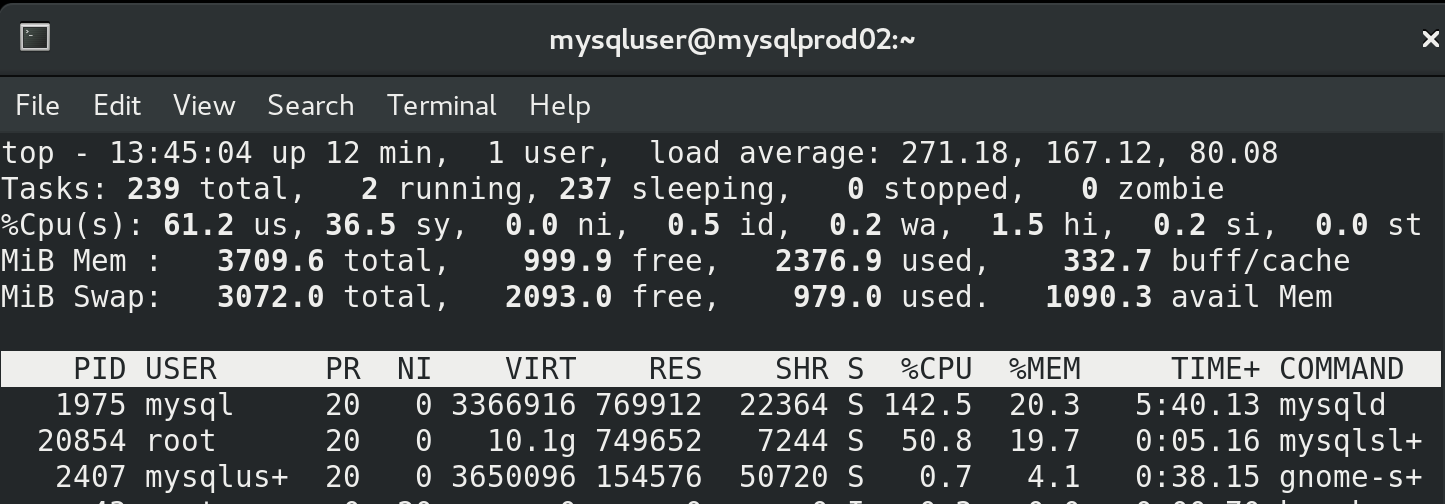

In [ ]:
Administrative connection management
========================================================

Admins can have different connection than max_connections , users who have connection_admin ( deprecated super privilege).

admin_address should be set up at startup else this admin connection is not available.

[root@mysqlprod02 ~]# cat /etc/my.cnf | grep admin
admin_address = 127.0.0.1
admin_port = 33064
[root@mysqlprod02 ~]# 

In [ ]:
DNS LOOKUP and HOST CACHE 
=========================================

The mysql server maintains a in-memory host cache that contains info about clients IP , hostname and error information.

host_cache_size | 628
max_connect_errors | 100

mysql> select * from performance_schema.host_cache \G
*************************** 1. row ***************************
                                        IP: 192.168.153.1
                                      HOST: NULL
                            HOST_VALIDATED: YES
                        SUM_CONNECT_ERRORS: 0
                 COUNT_HOST_BLOCKED_ERRORS: 0
                                FIRST_SEEN: 2024-06-01 14:05:31
                                 LAST_SEEN: 2024-06-01 14:07:24
                          FIRST_ERROR_SEEN: 2024-06-01 14:05:31
                           LAST_ERROR_SEEN: 2024-06-01 14:05:31


mysql> show variables like '%max_conne%';
+------------------------+-------+
| Variable_name          | Value |
+------------------------+-------+
| max_connect_errors     | 100   |
| max_connections        | 15    |

mysql> flush hosts;
Query OK, 0 rows affected, 1 warning (0.00 sec)

mysql> select * from performance_schema.host_cache \G
Empty set (0.00 sec)

In [ ]:
Mysql server time zone support 
==========================================

-- when the server starts , it attempts to determine the time zone of the host machine and uses it to set the 
   system_time_zone system varaible.

mysql> select @@GLOBAL.time_zone , @@SESSION.time_zone;
+--------------------+---------------------+
| @@GLOBAL.time_zone | @@SESSION.time_zone |
+--------------------+---------------------+
| SYSTEM             | SYSTEM              |
+--------------------+---------------------+
1 row in set (0.00 sec)


-- you can set the default-time-zone in option file OR set global and session time_zone variable at run-time 

mysql> set time_zone = 'UTC';
ERROR 1298 (HY000): Unknown or incorrect time zone: 'UTC'
mysql> 

-- you can load the time zone tables in mysql database with zoneinfo database of the OS using mysql_tzinfo_to_sql program

-- load from single time zone file 

[root@mysqlprod02 ~]# mysql_tzinfo_to_sql /usr/share/zoneinfo/UTC UTC | mysql mysql
[root@mysqlprod02 ~]# 

-- load from zoneinfo directory 

[root@mysqlprod02 ~]# mysql_tzinfo_to_sql /usr/share/zoneinfo/ | mysql mysql
Warning: Unable to load '/usr/share/zoneinfo//iso3166.tab' as time zone. Skipping it.
Warning: Unable to load '/usr/share/zoneinfo//leapseconds' as time zone. Skipping it.
Warning: Unable to load '/usr/share/zoneinfo//tzdata.zi' as time zone. Skipping it.
Warning: Unable to load '/usr/share/zoneinfo//zone.tab' as time zone. Skipping it.
Warning: Unable to load '/usr/share/zoneinfo//zone1970.tab' as time zone. Skipping it.
[root@mysqlprod02 ~]# 


mysql> set time_zone = 'UTC';
Query OK, 0 rows affected (0.00 sec)

mysql> select @@GLOBAL.time_zone , @@SESSION.time_zone ;
+--------------------+---------------------+
| @@GLOBAL.time_zone | @@SESSION.time_zone |
+--------------------+---------------------+
| SYSTEM             | UTC                 |
+--------------------+---------------------+
1 row in set (0.00 sec)


mysql> select now();
+---------------------+
| now()               |
+---------------------+
| 2024-06-02 07:12:31 |
+---------------------+
1 row in set (0.00 sec)

mysql> exit

mysql> select now();
+---------------------+
| now()               |
+---------------------+
| 2024-06-02 12:43:01 |
+---------------------+
1 row in set (0.00 sec)

In [ ]:
General query log and slow query log output destinations
=====================================================================

-- log output destination can be set in option file or at run-time using log-output variable ( TABLE , FILE , NONE )

mysql> select @@GLOBAL.log_output , @@SESSION.log_output;
ERROR 1238 (HY000): Variable 'log_output' is a GLOBAL variable

mysql> select @@GLOBAL.log_output;
+---------------------+
| @@GLOBAL.log_output |
+---------------------+
| FILE                |
+---------------------+
1 row in set (0.00 sec)

mysql> select @@GLOBAL.general_log;
+----------------------+
| @@GLOBAL.general_log |
+----------------------+
|                    0 |
+----------------------+
1 row in set (0.00 sec)

mysql> select @@GLOBAL.slow_query_log;
+-------------------------+
| @@GLOBAL.slow_query_log |
+-------------------------+
|                       0 |
+-------------------------+
1 row in set (0.00 sec)


--set log-output to TABLE and enable general log and slow query log 


mysql> set global log_output = 'TABLE';
Query OK, 0 rows affected (0.00 sec)

mysql> set global general_log = 'ON';
Query OK, 0 rows affected (0.00 sec)

mysql> set global slow_query_log = 'ON';
Query OK, 0 rows affected (0.00 sec)

mysql> select @@GLOBAL.log_output;
+---------------------+
| @@GLOBAL.log_output |
+---------------------+
| TABLE               |
+---------------------+
1 row in set (0.00 sec)

mysql> select @@GLOBAL.general_log;
+----------------------+
| @@GLOBAL.general_log |
+----------------------+
|                    1 |
+----------------------+
1 row in set (0.00 sec)

mysql> select @@GLOBAL.slow_query_log;
+-------------------------+
| @@GLOBAL.slow_query_log |
+-------------------------+
|                       1 |
+-------------------------+
1 row in set (0.00 sec)


mysql> set global long_query_time = 1;


mysql> select * from mysql.general_log \G

*************************** 1. row ***************************
  event_time: 2024-06-02 13:39:51.957976
   user_host: root[root] @ localhost []
   thread_id: 13
   server_id: 2
command_type: Query
    argument: 0x73657420676C6F62616C20736C6F775F71756572795F6C6F67203D20274F4E27
*************************** 2. row ***************************
  event_time: 2024-06-02 13:40:00.993337
   user_host: root[root] @ localhost []
   thread_id: 13
   server_id: 2


mysql> set global log_output = 'TABLE,FILE';
Query OK, 0 rows affected (0.00 sec)

mysql> select @@GLOBAL.log_output;
+---------------------+
| @@GLOBAL.log_output |
+---------------------+
| FILE,TABLE          |
+---------------------+
1 row in set (0.00 sec)


[root@mysqlprod02 mysql]# more mysqlprod02.log

Time                           Id Command    Argument
2024-06-02T08:23:43.124138Z	   13 Query	select @@GLOBAL.log_output
2024-06-02T08:24:44.323359Z	   14 Query	SHOW FULL COLUMNS FROM `sakila`.`film`
2024-06-02T08:24:44.335993Z	   14 Query	SHOW INDEXES FROM `sakila`.`film`
2024-06-02T08:25:43.320454Z	   15 Query	select count(*), rating , length from sakila.film
                                        group by  rating , length
                                        LIMIT 0, 5000

In [ ]:
Character sets and collations 
=============================================

-- A character set is a set of symbols and encodings.
-- A collation is a set of rules for comparing characters in a character set.

Example : symbols A,B,a,b may have encodings 0,1,2,3.
          The combination of this symbols and encodings is a character set.



Avaialble character sets in Mysql 
---------------------------------------------------------

mysql> show character set;
+----------+---------------------------------+---------------------+--------+
| Charset  | Description                     | Default collation   | Maxlen |
+----------+---------------------------------+---------------------+--------+
| armscii8 | ARMSCII-8 Armenian              | armscii8_general_ci |      1 |
| ascii    | US ASCII                        | ascii_general_ci    |      1 |
| big5     | Big5 Traditional Chinese        | big5_chinese_ci     |      2 |
| binary   | Binary pseudo charset           | binary              |      1 |
| cp1250   | Windows Central European        | cp1250_general_ci   |      1 |
| cp1251   | Windows Cyrillic                | cp1251_general_ci   |      1 |
| cp1256   | Windows Arabic                  | cp1256_general_ci   |      1 |
| cp1257   | Windows Baltic                  | cp1257_general_ci   |      1 |

mysql> show character set like '%latin%';
+---------+-----------------------------+-------------------+--------+
| Charset | Description                 | Default collation | Maxlen |
+---------+-----------------------------+-------------------+--------+
| latin1  | cp1252 West European        | latin1_swedish_ci |      1 |
| latin2  | ISO 8859-2 Central European | latin2_general_ci |      1 |
| latin5  | ISO 8859-9 Turkish          | latin5_turkish_ci |      1 |
| latin7  | ISO 8859-13 Baltic          | latin7_general_ci |      1 |
+---------+-----------------------------+-------------------+--------+
4 rows in set (0.00 sec)

mysql> show character set like '%utf%';
+---------+------------------+--------------------+--------+
| Charset | Description      | Default collation  | Maxlen |
+---------+------------------+--------------------+--------+
| utf16   | UTF-16 Unicode   | utf16_general_ci   |      4 |
| utf16le | UTF-16LE Unicode | utf16le_general_ci |      4 |
| utf32   | UTF-32 Unicode   | utf32_general_ci   |      4 |
| utf8mb3 | UTF-8 Unicode    | utf8mb3_general_ci |      3 |
| utf8mb4 | UTF-8 Unicode    | utf8mb4_0900_ai_ci |      4 |
+---------+------------------+--------------------+--------+
5 rows in set (0.00 sec)


Default character sets and collation assigned in Mysql 
--------------------------------------------------------------

mysql> show variables like '%character%';
+--------------------------+--------------------------------+
| Variable_name            | Value                          |
+--------------------------+--------------------------------+
| character_set_client     | utf8mb4                        |
| character_set_connection | utf8mb4                        |
| character_set_database   | utf8mb4                        |
| character_set_filesystem | binary                         |
| character_set_results    | utf8mb4                        |
| character_set_server     | utf8mb4                        |
| character_set_system     | utf8mb3                        |
| character_sets_dir       | /usr/share/mysql-8.0/charsets/ |
+--------------------------+--------------------------------+
8 rows in set (0.00 sec)

mysql> show variables like '%collation%';
+-------------------------------+--------------------+
| Variable_name                 | Value              |
+-------------------------------+--------------------+
| collation_connection          | utf8mb4_0900_ai_ci |
| collation_database            | utf8mb4_0900_ai_ci |
| collation_server              | utf8mb4_0900_ai_ci |
| default_collation_for_utf8mb4 | utf8mb4_0900_ai_ci |
+-------------------------------+--------------------+
4 rows in set (0.00 sec)


Change server character set 
-------------------------------------------------

[root@mysqlprod02 ~]# vi /etc/my.cnf
[root@mysqlprod02 ~]# 
[root@mysqlprod02 ~]# cat /etc/my.cnf | grep character
character-set-server = latin1
[root@mysqlprod02 ~]# 
[root@mysqlprod02 ~]# systemctl restart mysqld
[root@mysqlprod02 ~]# 

mysql> show variables like '%character_set%';
+--------------------------+--------------------------------+
| Variable_name            | Value                          |
+--------------------------+--------------------------------+
| character_set_client     | utf8mb4                        |
| character_set_connection | utf8mb4                        |
| character_set_database   | latin1                         |
| character_set_filesystem | binary                         |
| character_set_results    | utf8mb4                        |
| character_set_server     | latin1                         |
| character_set_system     | utf8mb3                        |
| character_sets_dir       | /usr/share/mysql-8.0/charsets/ |
+--------------------------+--------------------------------+
8 rows in set (0.00 sec)

mysql> show variables like '%collation%';
+-------------------------------+--------------------+
| Variable_name                 | Value              |
+-------------------------------+--------------------+
| collation_connection          | utf8mb4_0900_ai_ci |
| collation_database            | latin1_swedish_ci  |
| collation_server              | latin1_swedish_ci  |
| default_collation_for_utf8mb4 | utf8mb4_0900_ai_ci |
+-------------------------------+--------------------+
4 rows in set (0.00 sec)

mysql> create database salesdb;
Query OK, 1 row affected (0.19 sec)

mysql> use salesdb;
Database changed

mysql> create table sales_details ( sales_id int , sales_desc varchar(100) , sales_date datetime );
Query OK, 0 rows affected (0.03 sec)

mysql> select SCHEMA_NAME,DEFAULT_CHARACTER_SET_NAME,DEFAULT_COLLATION_NAME from information_schema.schemata;
+--------------------+----------------------------+------------------------+
| SCHEMA_NAME        | DEFAULT_CHARACTER_SET_NAME | DEFAULT_COLLATION_NAME |
+--------------------+----------------------------+------------------------+
| mysql              | utf8mb4                    | utf8mb4_0900_ai_ci     |
| information_schema | utf8mb3                    | utf8mb3_general_ci     |
| performance_schema | utf8mb4                    | utf8mb4_0900_ai_ci     |
| employeesdb        | utf8mb4                    | utf8mb4_0900_ai_ci     |
| productsdb         | utf8mb4                    | utf8mb4_0900_ai_ci     |
| ordersdb           | utf8mb4                    | utf8mb4_0900_ai_ci     |
| salesdb            | latin1                     | latin1_swedish_ci      |
+--------------------+----------------------------+------------------------+
7 rows in set (0.00 sec)

mysql> select TABLE_NAME,TABLE_TYPE,ENGINE,TABLE_COLLATION from information_schema.tables
    -> where TABLE_SCHEMA = 'salesdb';
+---------------+------------+--------+-------------------+
| TABLE_NAME    | TABLE_TYPE | ENGINE | TABLE_COLLATION   |
+---------------+------------+--------+-------------------+
| sales_details | BASE TABLE | InnoDB | latin1_swedish_ci |
+---------------+------------+--------+-------------------+
1 row in set (0.00 sec)


Assign character set at database creation 
-------------------------------------------------------

mysql> create database billingdb character set hebrew;
Query OK, 1 row affected (0.01 sec)

mysql> select SCHEMA_NAME,DEFAULT_CHARACTER_SET_NAME,DEFAULT_COLLATION_NAME from information_schema.schemata;
+--------------------+----------------------------+------------------------+
| SCHEMA_NAME        | DEFAULT_CHARACTER_SET_NAME | DEFAULT_COLLATION_NAME |
+--------------------+----------------------------+------------------------+
| billingdb          | hebrew                     | hebrew_general_ci      |
+--------------------+----------------------------+------------------------+
8 rows in set (0.00 sec)


Assign character set at table creation 
--------------------------------------------------

mysql> create table sales_details ( sales_id int , sales_desc varchar(100) , sales_date datetime )
    -> character set latin5;
Query OK, 0 rows affected (0.02 sec)

mysql> select TABLE_NAME,TABLE_TYPE,ENGINE,TABLE_COLLATION from information_schema.tables
    -> where TABLE_SCHEMA = 'billingdb';
+---------------+------------+--------+-------------------+
| TABLE_NAME    | TABLE_TYPE | ENGINE | TABLE_COLLATION   |
+---------------+------------+--------+-------------------+
| sales_details | BASE TABLE | InnoDB | latin5_turkish_ci |
+---------------+------------+--------+-------------------+
1 row in set (0.00 sec)

mysql> select TABLE_NAME,COLUMN_NAME,CHARACTER_SET_NAME,COLLATION_NAME from information_schema.columns 
    -> where TABLE_SCHEMA = 'billingdb';
+---------------+-------------+--------------------+-------------------+
| TABLE_NAME    | COLUMN_NAME | CHARACTER_SET_NAME | COLLATION_NAME    |
+---------------+-------------+--------------------+-------------------+
| sales_details | sales_date  | NULL               | NULL              |
| sales_details | sales_desc  | latin5             | latin5_turkish_ci |
| sales_details | sales_id    | NULL               | NULL              |
+---------------+-------------+--------------------+-------------------+
3 rows in set (0.01 sec)


Assign character set at column level 
-----------------------------------------------

mysql> create table sales_data ( sales_id int , 
    -> sales_short_desc varchar(100) character set latin1,
    -> sales_date datetime
    -> );
Query OK, 0 rows affected (0.03 sec)

mysql> select TABLE_NAME,COLUMN_NAME,CHARACTER_SET_NAME,COLLATION_NAME from information_schema.columns 
    -> where TABLE_SCHEMA = 'billingdb';
+------------+------------------+--------------------+-------------------+
| TABLE_NAME | COLUMN_NAME      | CHARACTER_SET_NAME | COLLATION_NAME    |
+------------+------------------+--------------------+-------------------+
| sales_data | sales_date       | NULL               | NULL              |
| sales_data | sales_id         | NULL               | NULL              |
| sales_data | sales_short_desc | latin1             | latin1_swedish_ci |
+------------+------------------+--------------------+-------------------+
3 rows in set (0.00 sec)

mysql> insert into sales_data values ( 1 , 'pencil sales qty 100' , now() );
Query OK, 1 row affected (0.01 sec)

mysql> insert into sales_data values ( 2 , 'pen sales qty 10' , now() );
Query OK, 1 row affected (0.17 sec)

mysql> insert into sales_data values ( 3 , 'book sales qty 25' , now() );
Query OK, 1 row affected (0.00 sec)


mysql> alter table sales_data modify sales_short_desc varchar(100) character set latin5;
Query OK, 3 rows affected (0.08 sec)
Records: 3  Duplicates: 0  Warnings: 0

mysql> select TABLE_NAME,COLUMN_NAME,CHARACTER_SET_NAME,COLLATION_NAME from information_schema.columns
    -> where TABLE_SCHEMA = 'billingdb';
+------------+------------------+--------------------+-------------------+
| TABLE_NAME | COLUMN_NAME      | CHARACTER_SET_NAME | COLLATION_NAME    |
+------------+------------------+--------------------+-------------------+
| sales_data | sales_date       | NULL               | NULL              |
| sales_data | sales_id         | NULL               | NULL              |
| sales_data | sales_short_desc | latin5             | latin5_turkish_ci |
+------------+------------------+--------------------+-------------------+
3 rows in set (0.00 sec)

In [ ]:
DATA TYPES 
=========================

Numeric Data Types 
-------------------------

Integer Types - tinyint , smallint , mediumint , int , bigint 

Fixed-Point Types - Numeric ( p , s )  , Decimal ( p , s )
                    mumeric ( 5 , 2 ) 999.99

Floating-Point Types - Float , Double

Bit Value Type - Bit


Date and Time Data Types 
---------------------------------

DATE , DATETIME , TIME , TIMESTAMP , YEAR 


String Data Types 
---------------------------

CHAR , VARCHAR , BINARY , VARBINARY , BLOB , TEXT , ENUM and SET.


BINARY & VARBINARY store binary strings.

mysql> create table t1 ( id binary(3));
Query OK, 0 rows affected (0.21 sec)

mysql> insert into t1 values ( 'a');
Query OK, 1 row affected (0.00 sec)

mysql> insert into t1 values ( '2');
Query OK, 1 row affected (0.00 sec)

mysql> insert into t1 values ( 100 );
Query OK, 1 row affected (0.01 sec)

mysql> insert into t1 values ( 1023 );
ERROR 1406 (22001): Data too long for column 'id' at row 1
mysql> 

mysql> 
mysql> select id , convert(id,char(100)) from t1;
+------------+-----------------------+
| id         | convert(id,char(100)) |
+------------+-----------------------+
| 0x610000   | a                     |
| 0x320000   | 2                     |
| 0x313030   | 100                   |
+------------+-----------------------+
3 rows in set (0.00 sec)


BLOB , TEXT 
----------------------------------

mysql> create table t2 ( item_bin_desc BLOB , item_str_desc TEXT );
Query OK, 0 rows affected (0.23 sec)

mysql> insert into t2 values 
    -> ( ' This is a text blob of description ' , ' This is a text string of description ' );
Query OK, 1 row affected (0.00 sec)

mysql> select * from t2;
+------------------------------------------------------+----------------------------------------+
| item_bin_desc                                        | item_str_desc                          |
+----------------------------------------------------- +----------------------------------------+
| 0x20546869732069732061207465787420626C6F62206F66206465736372697074696F6E20 | 
 This is a text string of description  |
+----------------------------------------------------------------------------+-------
1 row in set (0.00 sec)

mysql> select convert(item_bin_desc,text) from t2;
ERROR 1064 (42000): You have an error in your SQL syntax; 
mysql> 
mysql> select convert(item_bin_desc,char(100)) from t2;
+--------------------------------------+
| convert(item_bin_desc,char(100))     |
+--------------------------------------+
|  This is a text blob of description  |
+--------------------------------------+
1 row in set (0.00 sec)


ENUM TYPE 
------------------

mysql> create table fruits ( name varchar(20) , color enum('red','green','orange') );
Query OK, 0 rows affected (0.03 sec)

mysql> insert into fruits values ( 'apple ' , 'red' );
Query OK, 1 row affected (0.00 sec)

mysql> insert into fruits values ( 'grapes' , 'green' );
Query OK, 1 row affected (0.00 sec)

mysql> insert into fruits values ( 'mango' , 'yellow');
ERROR 1265 (01000): Data truncated for column 'color' at row 1


In [ ]:
Innodb Storage Engine 
=========================================

-- is a general-purpose storage engine that balances high reliablity and high performance.
-- is the default storage engine from 8.0
-- follows ACID model , with transactions featuring commit , rollback and crash-recovery.
-- supports row level locking and mvcc.
-- supports foreign key constraints for data-integrity.

mysql> show engines;

mysql> select * from information_schema.engines
    -> where support = 'Default';
+--------+---------+------------------------------------------------------------+------------
| ENGINE | SUPPORT | COMMENT                           | TRANSACTIONS | XA   | SAVEPOINTS |
+--------+---------+------------------------------------------------------------+------------
| InnoDB | DEFAULT | Supports transactions, row-level  | YES          | YES  | YES        |
                     locking, and foreign keys
+--------+---------+------------------------------------------------------------+------------
1 row in set (0.00 sec)

In [ ]:
Innodb Indexes 
=========================================

Indexes are used to retreive the data faster.

Innodb indexes are B-Tree data structures with exception of spatial indexes which are R-Trees.


Clustered Index 
--------------------------

Clustered Index is a special index created on a primary key.

if primary key is not defined , innodb uses the first unique index with all key columns defined as not null
as the cluster index.

if a table has no primary key or a suitable unique index , innodb generates a hidden clustered index.

mysql> create table order1(order_id int primary key , order_details varchar(20) , order_date datetime );
Query OK, 0 rows affected (0.03 sec)

mysql> show index from order1;
-----+---------+---------------+---------+------------+
| Table  | Non_unique | Key_name | Seq_in_index | Column_name |
+--------+------------+----------+--------------+-------------+
| order1 |          0 | PRIMARY  |            1 | order_id    |

mysql> select TABLE_NAME,INDEX_NAME,COLUMN_NAME,INDEX_TYPE,IS_VISIBLE 
    -> from information_schema.statistics where TABLE_SCHEMA = 'bosp';
+------------+------------+-------------+------------+------------+
| TABLE_NAME | INDEX_NAME | COLUMN_NAME | INDEX_TYPE | IS_VISIBLE |
+------------+------------+-------------+------------+------------+
| order1     | PRIMARY    | order_id    | BTREE      | YES        |
+------------+------------+-------------+------------+------------+


mysql> create table order2(order_id int unique not null , order_details varchar(20) , order_date datetime );
Query OK, 0 rows affected (0.02 sec)

mysql> show index from order2;
+--------+------------+----------+--------------+-------------
| Table  | Non_unique | Key_name | Seq_in_index | Column_name 
-----+---------+---------------+---------+------------+-------
| order2 |          0 | order_id |            1 | order_id    

+------------+------------+-------------+------------+------------+
| TABLE_NAME | INDEX_NAME | COLUMN_NAME | INDEX_TYPE | IS_VISIBLE |
+------------+------------+-------------+------------+------------+
| order1     | PRIMARY    | order_id    | BTREE      | YES        |
| order2     | order_id   | order_id    | BTREE      | YES        |
+------------+------------+-------------+------------+------------+


mysql> create table order3(order_id int not null , order_details varchar(20) , order_date datetime );
Query OK, 0 rows affected (0.04 sec)

mysql> show index from order3;
Empty set (0.00 sec)

mysql> set global sql_generate_invisible_primary_key = ON;
Query OK, 0 rows affected (0.00 sec)

mysql> create table order4(order_id int not null , order_details varchar(20) , order_date datetime );
Query OK, 0 rows affected (0.07 sec)

mysql> show index from order4;
+--------+------------+----------+--------------+-------------+
| Table  | Non_unique | Key_name | Seq_in_index | Column_name |
--------+---------+---------------+---------+------------+-----
| order4 |          0 | PRIMARY  |            1 | my_row_id   |

+------------+------------+-------------+------------+------------+
| TABLE_NAME | INDEX_NAME | COLUMN_NAME | INDEX_TYPE | IS_VISIBLE |
+------------+------------+-------------+------------+------------+
| order1     | PRIMARY    | order_id    | BTREE      | YES        |
| order2     | order_id   | order_id    | BTREE      | YES        |
| order4     | PRIMARY    | my_row_id   | BTREE      | YES        |
+------------+------------+-------------+------------+------------+


Secondary Index 
=============================

Indexes other than clustered index are known as secondary indexes.

mysql> create index idx_orderdetails_orderdate on order1 (order_details,order_date);

mysql> create index idx_orderid_orderdetials on order1 (order_id , order_details);

mysql> show index from order1;
+--------+------------+----------------------------+--------------+---------------+
| Table  | Non_unique | Key_name                   | Seq_in_index | Column_name   |
+--------+------------+----------------------------+--------------+---------------+
| order1 |          0 | PRIMARY                    |            1 | order_id      |
| order1 |          1 | idx_orderdetails_orderdate |            1 | order_details |
| order1 |          1 | idx_orderdetails_orderdate |            2 | order_date    |
| order1 |          1 | idx_orderid_orderdetials   |            1 | order_id      |
| order1 |          1 | idx_orderid_orderdetials   |            2 | order_details |
+--------+------------+----------------------------+--------------+---------------+



Full-Text Index 
=======================================

Full-text indexes are created on text-based columns ( char , varchar and text ).

When an innodb full-text index is created , a set of index tables is created.

mysql> create table books (
    -> book_id int primary key,
    -> book_name varchar(50),
    -> book_author varchar(50),
    -> book_description text(500),
    -> fulltext idx (book_description)
    -> );
Query OK, 0 rows affected (0.43 sec)

mysql> show index from books;
+-------+------------+----------+--------------+-----------------------------+
| Table | Non_unique | Key_name | Seq_in_index | Column_name | Index_type 
+-------+------------+----------+--------------+------------------------------+
| books |          0 | PRIMARY  |            1 | book_id             BTREE      
| books |          1 | idx      |            1 | book_description    FULLTEXT   
+-------+------------+----------+--------------+-------------------------------

mysql> select * from information_schema.innodb_tables where name like '%bosp/fts%';
+----------+----------------------------------------------------+------+--------+-------+
| TABLE_ID | NAME                                               | FLAG | N_COLS | SPACE |
+----------+----------------------------------------------------+------+--------+-------+
|     1116 | bosp/fts_000000000000045b_being_deleted            |   33 |      4 |    55 |
|     1117 | bosp/fts_000000000000045b_being_deleted_cache      |   33 |      4 |    56 |
|     1118 | bosp/fts_000000000000045b_config                   |   33 |      5 |    57 |
|     1119 | bosp/fts_000000000000045b_deleted                  |   33 |      4 |    58 |
|     1120 | bosp/fts_000000000000045b_deleted_cache            |   33 |      4 |    59 |
|     1121 | bosp/fts_000000000000045b_0000000000000101_index_1 |   33 |      8 |    60 |
|     1122 | bosp/fts_000000000000045b_0000000000000101_index_2 |   33 |      8 |    61 |
|     1123 | bosp/fts_000000000000045b_0000000000000101_index_3 |   33 |      8 |    62 |
|     1124 | bosp/fts_000000000000045b_0000000000000101_index_4 |   33 |      8 |    63 |
|     1125 | bosp/fts_000000000000045b_0000000000000101_index_5 |   33 |      8 |    64 |
|     1126 | bosp/fts_000000000000045b_0000000000000101_index_6 |   33 |      8 |    65 |
+----------+----------------------------------------------------+------+--------+-------+


Innodb full-text index cache 
--------------------------------------

is used to temporarirly cache index table insertions for recently inserted rows.

+---------------------------------+------------+
| Variable_name                   | Value      |
+---------------------------------+------------+
| innodb_ft_aux_table             |            |
| innodb_ft_cache_size            | 8000000    |
| innodb_ft_total_cache_size      | 640000000  |
+---------------------------------+------------+


Innodb full-text index DOC_ID and FTS_DOC_ID
---------------------------------------------------

InnoDB uses a unique document identifier referred to as the DOC_ID to map words in the full-text index to document records 
where the word appears. 
The mapping requires an FTS_DOC_ID column on the indexed table. If an FTS_DOC_ID column is not defined, 
InnoDB automatically adds a hidden FTS_DOC_ID column when the full-text index is created.

mysql> create table books ( book_id int primary key , book_name varchar(20) , book_desc text(500) );

mysql> create fulltext index ftidx_bookdesc on books (book_desc);
Records: 0  Duplicates: 0  Warnings: 1

mysql> show warnings;
+---------+------+--------------------------------------------------+
| Level   | Code | Message                                          |
+---------+------+--------------------------------------------------+
| Warning |  124 | InnoDB rebuilding table to add column FTS_DOC_ID |
+---------+------+--------------------------------------------------+
1 row in set (0.00 sec)


InnoDB Full-Text Index Deletion Handling
----------------------------------------------

Deleting a record that has a full-text index column could result in numerous small deletions in the auxiliary index tables, 
making concurrent access to these tables a point of contention. To avoid this problem, the DOC_ID of a deleted document is 
logged in a special FTS_*_DELETED table whenever a record is deleted from an indexed table, and the indexed record remains 
in the full-text index


